<h1>Flats prices analysis in St. Petersburg</h1>

<div style="background:#abd5f5; border:1px solid #b3deff; padding: 20px">
    <h2 style="color:#002b63">Table of content</h2>
<ul>
    <li>Indroduction</li>
    <li>Visualization and Data Preprocessing</li>
    <li>Model building</li>
    <li>Conclusion</li>
</ul>
    </div>

<h2>Indroduction</h2>

This analysis focuses on flat prices in St. Petersburg. 
- First step is visualization. I am going to explore data with different plots
- Next, I prepare data for analysis. 
- At last, I want to build predictive models using different methods.

<h2>Visualization and Data Preprocessing</h2>

I am going to use my own CSV file. I created it using data from https://spb.cian.ru/kupit-kvartiru/ This file contains a list of St. Petersburg flats for sale.

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt

In [2]:
flats=pd.read_csv('data/clean_data_from_cian_2021.csv',sep=';')
flats.head()

,link,price,total_area,living_area,kitchen_area,floor,type,height,bathrooms,balconies,...,renovation,view,rooms,city,area,neighborhood,street,metro_name,metro_km,number_of_floors
0,https://spb.cian.ru/sale/flat/234775065/,13143249.0,74.13,26.3,22.0,3,Новостройка,3.3,2.0,1.0,...,NaN,NaN,2,Санкт-Петербург,р-н Приморский,Юнтолово,"Планерная ул., 94",Комендантский проспект,1.98,12
1,https://spb.cian.ru/sale/flat/239273301/,12430600.0,47.81,NaN,NaN,2,Новостройка,NaN,0.0,0.0,...,NaN,NaN,1,Санкт-Петербург,р-н Петроградский,Посадский,"ул. Рентгена, 25",Петроградская,1.04,8
2,https://spb.cian.ru/sale/flat/250966190/,13800000.0,44.10,14.1,19.4,2,Новостройка,NaN,0.0,0.0,...,NaN,NaN,1,Санкт-Петербург,р-н Курортный,мкр. Сестрорецк,"ул. Максима Горького, 2Ас2",Беговая,9.57,5
3,https://spb.cian.ru/sale/flat/249950664/,8730851.0,56.29,29.3,10.9,5,Новостройка,NaN,2.0,2.0,...,NaN,NaN,2,Санкт-Петербург,р-н Приморский,Юнтолово,Нью Тайм жилой комплекс,Комендантский проспект,1.98,13
4,https://spb.cian.ru/sale/flat/250766812/,13650000.0,70.80,NaN,10.0,13,Вторичка,2.8,1.0,1.0,...,Евроремонт,На улицу и двор,2,Санкт-Петербург,р-н Приморский,Комендантский аэродром,"аллея Поликарпова, 6к1",Пионерская,1.04,19


Features description.

<table>
    <tr>
        <th>N</th>
        <th>Name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>link</td>
        <td>Link to the page with the flat on cian.ru</td>
    </tr>
    <tr>
        <td>2</td>       
        <td>price</td>
        <td>Flat price</td>
    </tr>
    <tr>
        <td>3</td>
        <td>total_area</td>
        <td>The total area of the flat in square meters</td>
    </tr>
    <tr>
        <td>4</td>        
        <td>living_area</td>
        <td>All bedrooms area plus living room in square meters</td>
    </tr>
    <tr>
        <td>5</td>
        <td>kitchen_area</td>
        <td>Kitchen area in square meters</td>
    </tr>
    <tr>
        <td>6</td>
        <td>floor</td>
        <td>Floor number where the flat is located</td>
    </tr>
    <tr>
        <td>7</td>
        <td>type</td>
        <td>Building type: new (still under construction) or old</td>
    </tr>
    <tr>
        <td>8</td>
        <td>height</td>
        <td>Ceiling height</td>
    </tr>    
    <tr>
        <td>9</td>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>10</td>
        <td>balconies</td>
        <td>Number of balconies</td>
    </tr>
    <tr>
        <td>11</td>
        <td>finishing</td>
        <td>Finishing type of new flats: renovated and without</td>
    </tr>    
    <tr>
        <td>12</td>
        <td>year_of_construction</td>
        <td>Year when the building was or will be built</td>
    </tr>    
    <tr>
        <td>13</td>
        <td>layout</td>
        <td>The layout determines how the entrance to the rooms is located: through another room or through a corridor</td>
    </tr>    
    <tr>
        <td>14</td>
        <td>renovation</td>
        <td>Type of renovation</td>
    </tr>    
    <tr>
        <td>15</td>
        <td>view</td>
        <td>View from windows</td>
    </tr> 
    <tr>
        <td>16</td>
        <td>rooms</td>
        <td>Number of rooms</td>
    </tr>     
    <tr>
        <td>17</td>
        <td>city</td>
        <td>City name</td>
    </tr>     
    <tr>
        <td>18</td>
        <td>area</td>
        <td>Area name</td>
    </tr>     
    <tr>
        <td>19</td>
        <td>neighborhood</td>
        <td>Neighborhood name</td>
    </tr> 
    <tr>
        <td>20</td>
        <td>street</td>
        <td>Street name</td>
    </tr>     
    <tr>
        <td>21</td>
        <td>metro_name</td>
        <td>The closest metro station</td>
    </tr>     
    <tr>
        <td>22</td>
        <td>metro_km</td>
        <td>Distance to the closest metro station in km</td>
    </tr>     
    <tr>
        <td>23</td>
        <td>number_of_floors</td>
        <td>Number of floors in the buildings</td>
    </tr>
</table>

I decided not to take geo data for analysis because they give too much categories and it spoiles models. Because of it, I remove them.

In [3]:
flats.drop(columns=['link','area','city','neighborhood','street','metro_name'],inplace=True)

I calcuclate the price for a square meter instead of the price.

In [4]:
flats.insert(0,'price_meter',0.0)
flats['price_meter']=flats['price']/flats['total_area']
flats.drop(columns=['price'],inplace=True)

Let's check the dependence between price per meter and numerical variables.

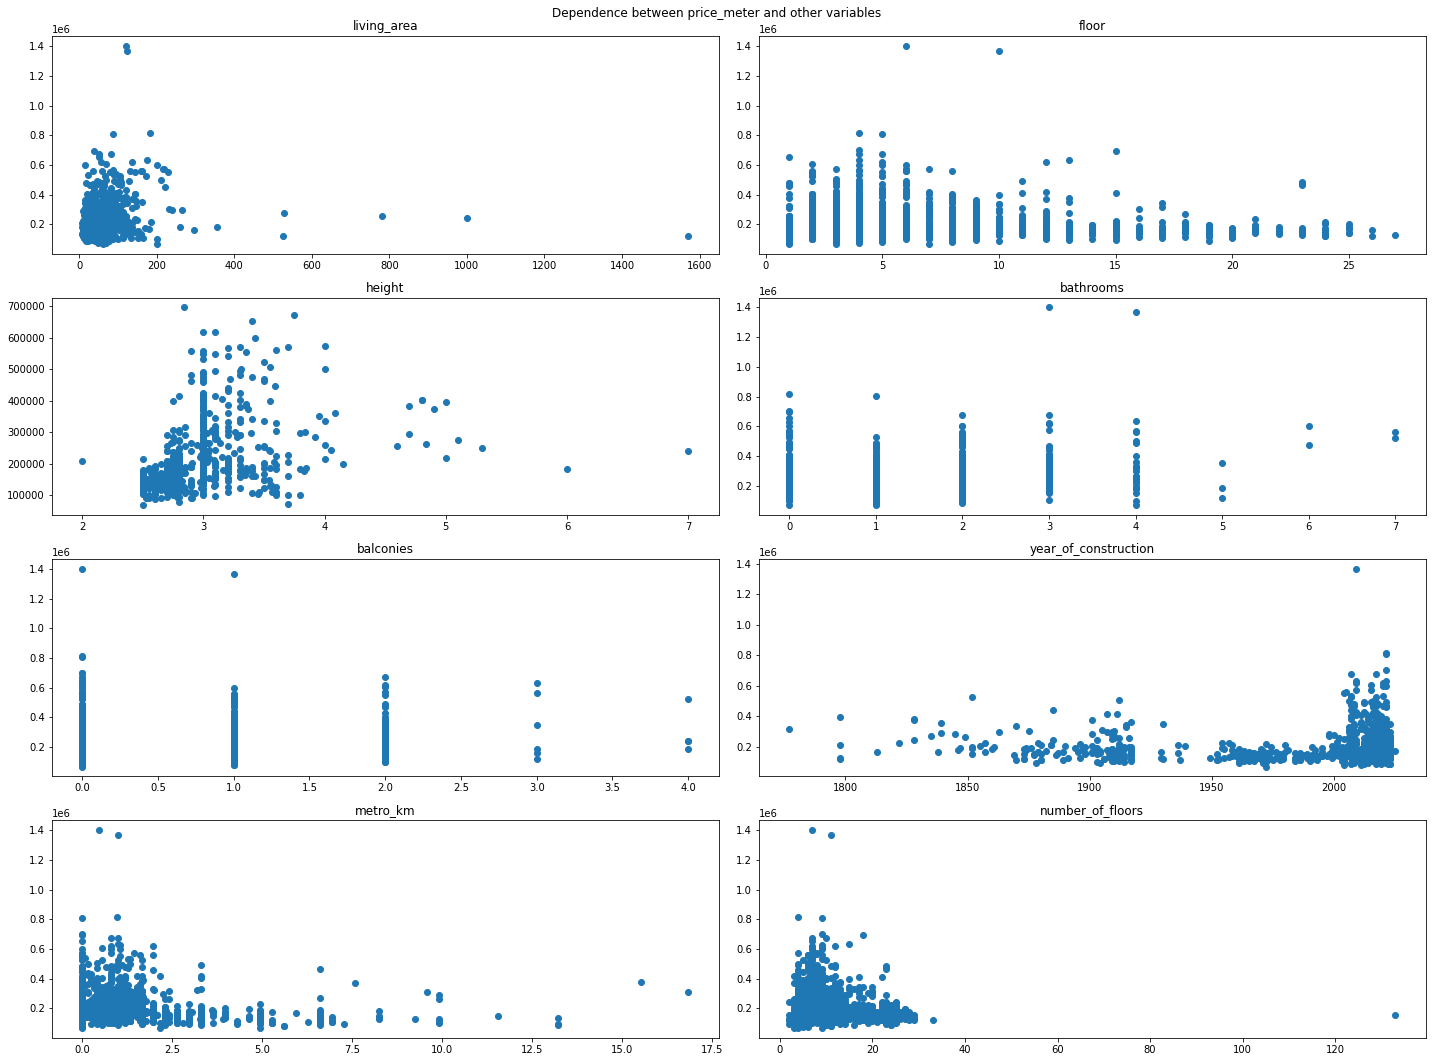

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('Dependence between price_meter and other variables')

axs[0,0].scatter(flats['living_area'],flats['price_meter'])
axs[0,0].set_title('living_area')

axs[0,1].scatter(flats['floor'],flats['price_meter'])
axs[0,1].set_title('floor')

axs[1,0].scatter(flats['height'],flats['price_meter'])
axs[1,0].set_title('height')

axs[1,1].scatter(flats['bathrooms'],flats['price_meter'])
axs[1,1].set_title('bathrooms')

axs[2,0].scatter(flats['balconies'],flats['price_meter'])
axs[2,0].set_title('balconies')

axs[2,1].scatter(flats['year_of_construction'],flats['price_meter'])
axs[2,1].set_title('year_of_construction')

axs[3,0].scatter(flats['metro_km'],flats['price_meter'])
axs[3,0].set_title('metro_km')

axs[3,1].scatter(flats['number_of_floors'],flats['price_meter'])
axs[3,1].set_title('number_of_floors')

plt.tight_layout()
plt.show()

As we see, we have outliers. Let's remove them.

In [6]:
flats = flats[(flats['living_area']<350)&(flats['price_meter']<1200000)
             &(flats['height']>2)&(flats['height']<6)
             &(flats['metro_km']<10)&(flats['number_of_floors']<30)
             &(flats['bathrooms']<6)&(flats['balconies']<4)]

Let's check categorical values.

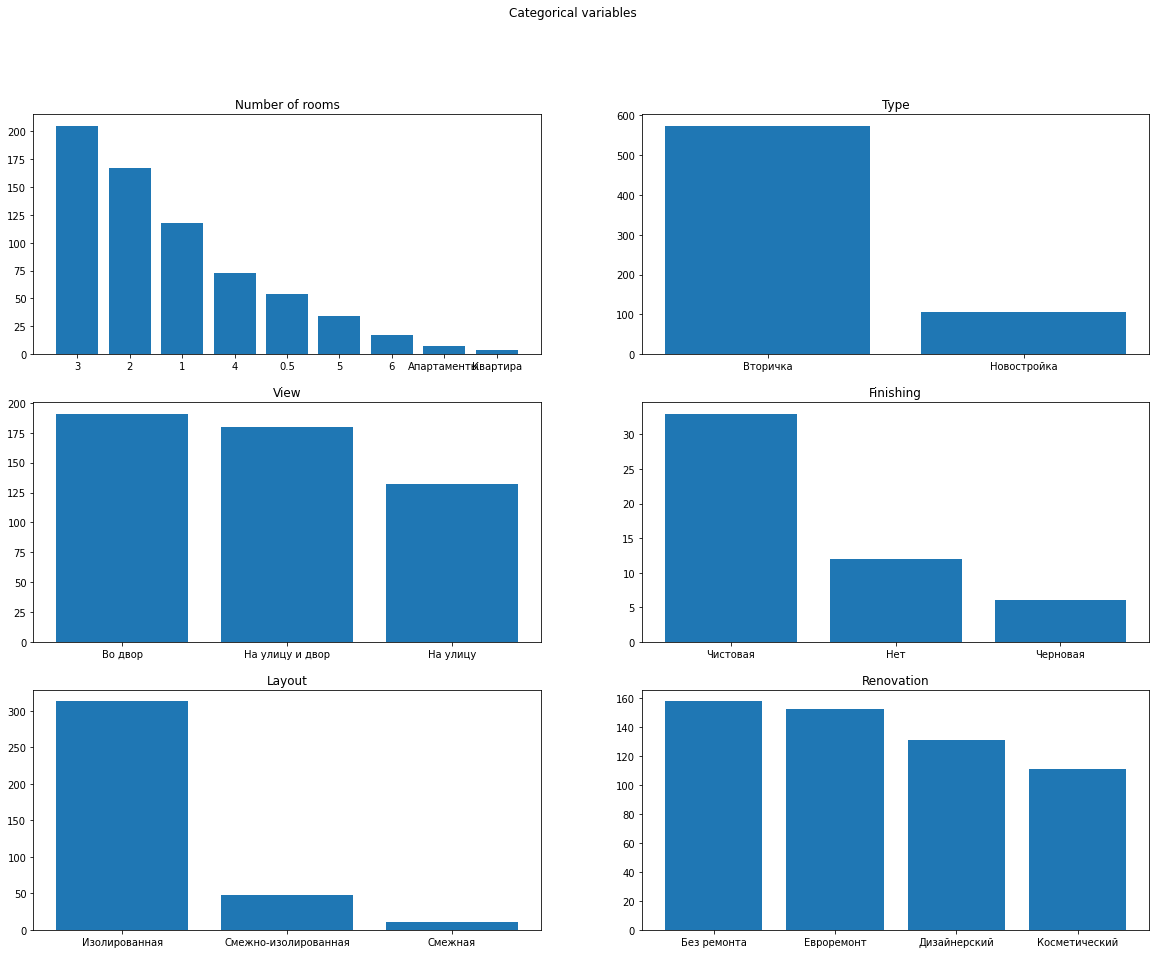

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Categorical variables')

# replace Студия with 0,5 and Многокомнатная with 6
flats['rooms']=flats['rooms'].replace(['Студия','Многокомнатная','Многокомнатные'],['0.5','6','6'])
rooms = dict(flats['rooms'].value_counts())
axs[0,0].bar(rooms.keys(),rooms.values())
axs[0,0].set_title('Number of rooms')

types = dict(flats['type'].value_counts())
axs[0,1].bar(types.keys(),types.values())
axs[0,1].set_title('Type')

views = dict(flats['view'].value_counts())
axs[1,0].bar(views.keys(),views.values())
axs[1,0].set_title('View')

finishings = dict(flats['finishing'].value_counts())
axs[1,1].bar(finishings.keys(),finishings.values())
axs[1,1].set_title('Finishing')

layouts = dict(flats['layout'].value_counts())
axs[2,0].bar(layouts.keys(),layouts.values())
axs[2,0].set_title('Layout')

renovations = dict(flats['renovation'].value_counts())
axs[2,1].bar(renovations.keys(),renovations.values())
axs[2,1].set_title('Renovation')

plt.show()

Values 'Апартаменты', 'Квартира' don't contain information about the number of rooms so I replace them with the most frequent value. Also, I convert the column into the float format.

In [8]:
flats['rooms']=flats['rooms'].replace(['Апартаменты','Квартира'],flats['rooms'].value_counts().idxmax())
flats['rooms']=flats['rooms'].astype(float)

Next, I will translate all categorical values into English.

In [9]:
flats['type']=flats['type'].replace(['Вторичка','Новостройка'],['secondary','new'])
flats['view']=flats['view'].replace(['На улицу и двор','Во двор','На улицу'],['both','view_courtyard','view_street'])
flats['finishing']=flats['finishing'].replace(['Чистовая','Нет','Черновая'],['fine','none','rough'])
flats['layout']=flats['layout'].replace(['Изолированная','Смежно-изолированная','Смежная'],['isolated','mixed','adjoining'])
flats['renovation']=flats['renovation'].replace(['Евроремонт','Без ремонта','Косметический','Дизайнерский'],
                                                ['euro','none','redecorating','designer'])

The next step is finding and dealing with missing data. Firstly, let's identify NaNs and zeros.

In [10]:
pd.isna(flats).sum()

price_meter               0
total_area                0
living_area               0
kitchen_area             67
floor                     0
type                      0
height                    0
bathrooms                 0
balconies                 0
finishing               628
year_of_construction     96
layout                  308
renovation              126
view                    176
rooms                     0
metro_km                  0
number_of_floors          0
dtype: int64

Now I will find out the proportion between living_area, kitchen_area, total_area and replace missing data with the most common proportion.

In [11]:
flats['living_part']=flats['living_area']/flats['total_area']
flats['kitchen_part']=flats['kitchen_area']/flats['total_area']
flats['living_area']=flats['living_area'].combine_first(flats['total_area']*flats['living_part'].mean())
flats['kitchen_area']=flats['kitchen_area'].combine_first(flats['total_area']*flats['kitchen_part'].mean())
flats.drop(['living_part','kitchen_part'],axis='columns',inplace=True)

I replace missing data in columns 'view', 'finishing', 'layout', 'renovation','year_of_construction' with the most popular value. Also, I replace the height with the mean value. 

In [12]:
flats['view']=flats['view'].replace(np.nan,flats['view'].value_counts().idxmax())
flats['finishing']=flats['finishing'].replace(np.nan,flats['finishing'].value_counts().idxmax())
flats['layout']=flats['layout'].replace(np.nan,flats['layout'].value_counts().idxmax())
flats['renovation']=flats['renovation'].replace(np.nan,flats['renovation'].value_counts().idxmax())
flats['year_of_construction']=flats['year_of_construction'].replace(np.nan,
                              flats['year_of_construction'].value_counts().idxmax())
flats['height']=flats['height'].replace(np.nan,flats['height'].mean())

<h2>Model building</h2>

Here I am going to build a predictive model. Price per meter is a dependent value. The rest of the characteristics are independent values. First, I need to prepare a dataframe.

In [13]:
flats_model = flats.copy()
flats_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 1412
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_meter           679 non-null    float64
 1   total_area            679 non-null    float64
 2   living_area           679 non-null    float64
 3   kitchen_area          679 non-null    float64
 4   floor                 679 non-null    int64  
 5   type                  679 non-null    object 
 6   height                679 non-null    float64
 7   bathrooms             679 non-null    float64
 8   balconies             679 non-null    float64
 9   finishing             679 non-null    object 
 10  year_of_construction  679 non-null    float64
 11  layout                679 non-null    object 
 12  renovation            679 non-null    object 
 13  view                  679 non-null    object 
 14  rooms                 679 non-null    float64
 15  metro_km              

Next, I need to turn all categorical values into numerical. I use 'get_dummies' function for one-hot encoding.

In [14]:
cat_df=flats_model[['type','view','finishing','layout','renovation']]
cat_df=pd.get_dummies(data=cat_df,drop_first=True)

#Join all the dataframes in one
flats_model=pd.concat([flats_model,cat_df],axis=1)
flats_model.drop(['type','view','finishing','layout','renovation'],axis='columns',inplace=True)

# Check the result
flats_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 1412
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_meter              679 non-null    float64
 1   total_area               679 non-null    float64
 2   living_area              679 non-null    float64
 3   kitchen_area             679 non-null    float64
 4   floor                    679 non-null    int64  
 5   height                   679 non-null    float64
 6   bathrooms                679 non-null    float64
 7   balconies                679 non-null    float64
 8   year_of_construction     679 non-null    float64
 9   rooms                    679 non-null    float64
 10  metro_km                 679 non-null    float64
 11  number_of_floors         679 non-null    int64  
 12  type_secondary           679 non-null    uint8  
 13  view_view_courtyard      679 non-null    uint8  
 14  view_view_street         

"total_area" and "living_area" obviously have strong correlation. I think it is better to remove "total_area" because this feature has already been taken into account when I calculated "price_meter".

In [15]:
flats_model.drop(['total_area'],axis='columns',inplace=True)

Let's separate dependent and independent values. Y is a price that has a big range of values. Because of it, I'm going to use the logarithm of the price I After that, I'm going to divide them into training and test sets. 

In [16]:
Y = flats_model['price_meter']
Y = np.log(Y)
X = flats_model.drop(['price_meter'],axis=1)

# split on test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Build Random Forest model with default parameters.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#scaling
scale = StandardScaler().fit(X_train)
X_train_sc = scale.transform(X_train)
X_test_sc = scale.transform(X_test)

# create and fit the model
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train_sc,Y_train)
Y_pred_rf = model_rf.predict(X_test_sc)

# accuracy
r2_rf = r2_score(Y_test, Y_pred_rf)
rmse_rf =  mean_squared_error(Y_test, Y_pred_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)

print('RandomForestRegressor')
print('r2 =',r2_rf)
print('rmse_rf =',rmse_rf)
print('mae_rf =',mae_rf)

RandomForestRegressor
r2 = 0.5667334401546499
rmse_rf = 0.08727348771154446
mae_rf = 0.22034909115185355


Let's try to improve the model

In [31]:
from sklearn.model_selection import GridSearchCV
    
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)
grid_search.fit(X_train_sc,Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=3)

In [62]:
model_rf_up = grid_search.best_estimator_
model_rf_up.fit(X_train_sc,Y_train)
Y_pred_rf_up = model_rf_up.predict(X_test_sc)

# accuracy
r2_rf_up = r2_score(Y_test, Y_pred_rf_up)
rmse_rf_up =  mean_squared_error(Y_test, Y_pred_rf_up)
mae_rf_up = mean_absolute_error(Y_test, Y_pred_rf_up)

print('RandomForestRegressor with hyperperameter tuning')
print('r2 =',r2_rf_up)
print('rmse_rf =',rmse_rf_up)
print('mae_rf =',mae_rf_up)

RandomForestRegressor with hyperperameter tuning
r2 = 0.5166041405499945
rmse_rf = 0.09737110247922195
mae_rf = 0.23709029268541662


Let's try XGBRegressor

In [60]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=0)
model_xgb.fit(X_train_sc,Y_train)
Y_pred_xgb = model_xgb.predict(X_test_sc)

# accuracy
r2_xgb = r2_score(Y_test, Y_pred_xgb)
rmse_xgb =  mean_squared_error(Y_test, Y_pred_xgb)
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)

print('XGBRegressor')
print('r2 =',r2_xgb)
print('rmse_rf =',rmse_xgb)
print('mae_rf =',mae_xgb)

XGBRegressor
r2 = 0.5025728967681412
rmse_rf = 0.10019743549280681
mae_rf = 0.23763871138146223


Let's try to improve the model

In [56]:
param_grid_xgb = {
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100, 200, 300, 1000],
}

grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid_xgb, cv = 3, n_jobs = -1, verbose = 3)
grid_search_xgb.fit(X_train_sc,Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [61]:
model_xgb_up = grid_search_xgb.best_estimator_
model_xgb_up.fit(X_train_sc,Y_train)
Y_pred_xgb_up = model_xgb_up.predict(X_test_sc)

# accuracy
r2_xgb_up = r2_score(Y_test, Y_pred_xgb_up)
rmse_xgb_up =  mean_squared_error(Y_test, Y_pred_xgb_up)
mae_xgb_up = mean_absolute_error(Y_test, Y_pred_xgb_up)

print('XGBRegressor with hyperperameter tuning')
print('r2 =',r2_xgb_up)
print('rmse_rf =',rmse_xgb_up)
print('mae_rf =',mae_xgb_up)

XGBRegressor with hyperperameter tuning
r2 = 0.552546898016776
rmse_rf = 0.09013110268967933
mae_rf = 0.22438264606091762


We have got the best result with XGBRegressor with hyperperameter tuning

<h2>Conclusion</h2>

Summarising all above
- I cleaned and preprocessed the data. I replace missing data with the most frequent value. Also, I turned categorical variables into numerical.
- I created regression models for predicting a price per meter for flats in Saint Petersburg using Random Forest Regression and XGBoost
- I have got the best result with XGBRegressor which explain more than a half of dispertion. It is a very good result